In [1]:
#import libraries
import pandas as pd
import numpy as np

import random

import operator
import math
import tqdm

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud



import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

import joblib

In [2]:
df = pd.read_csv(r"C:\Users\Laptop\Downloads\RRWebscraping.csv")
df.head()

,Reveiw,Rating
0,this product was amazing and quality are amazi...,3
1,very important tool thank you flipkart nice pr...,5
2,The Product is awesome at this very price rang...,4
3,Strong and robust tools. Good fast delivery fr...,5
4,Product is nice but not prefect.....for the pr...,3


In [3]:
#Basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Reveiw  8087 non-null   object
 1   Rating  8087 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 126.5+ KB


In [4]:
#lets see the column names
df.columns

Index(['Reveiw', 'Rating'], dtype='object')

In [5]:
#lets see the datatypes
df.dtypes

Reveiw    object
Rating     int64
dtype: object

In [7]:
#no of rows and columns
df.shape

(8087, 2)

In [9]:
#finding missing values
df.isnull().sum()

Reveiw    0
Rating    0
dtype: int64

<AxesSubplot:>

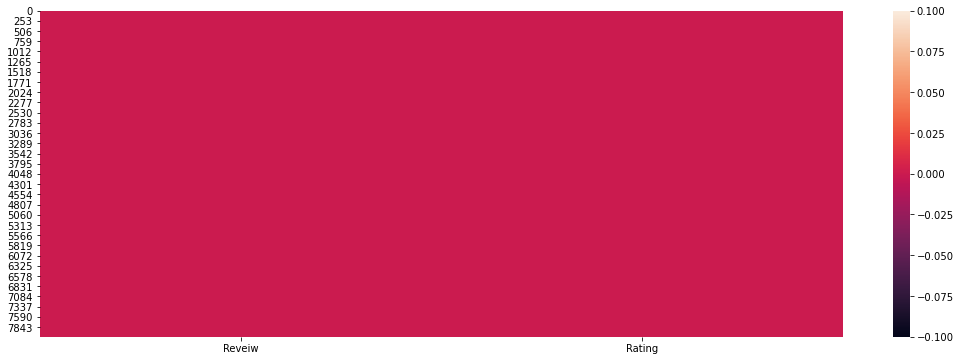

In [13]:
#graphical visualization of missing values
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull())

In [14]:
#Column Rating Statstics
df['Rating'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

In [15]:
df['Rating'].value_counts()

5    4925
1     994
4     982
3     802
2     384
Name: Rating, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

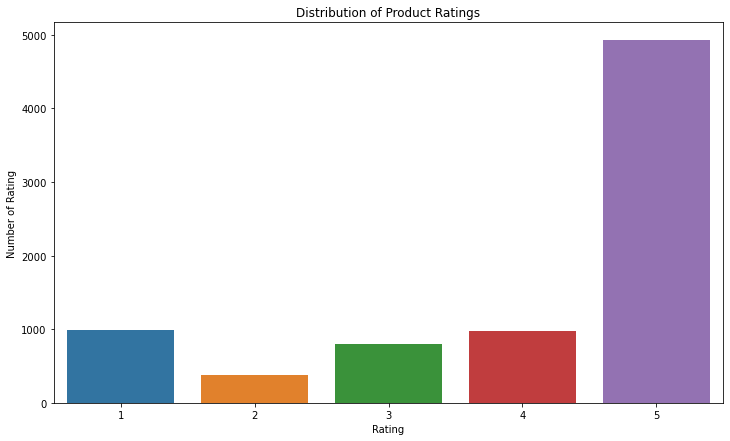

In [16]:
f,axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Rating'])
ax.set(title="Distribution of Product Ratings",xlabel="Rating",ylabel="Number of Rating")
plt.show

In [21]:
#Lets remove the word reveiw and replace it with 'read more'
df["Reveiw"]=df["Reveiw"].replace(to_replace='READ MORE', value="",regex=True)
df["Reveiw"]

0       this product was amazing and quality are amazi...
1       very important tool thank you flipkart nice pr...
2       The Product is awesome at this very price rang...
3       Strong and robust tools. Good fast delivery fr...
4       Product is nice but not prefect.....for the pr...
                              ...                        
8082    Could not find an activation key included for ...
8083    Looks very nice. Worth for money. Very light w...
8084           Good laptop for personal use in low budget
8085    Need to replace immediately damaged adapter, n...
8086                                      Good product !!
Name: Reveiw, Length: 8087, dtype: object

In [22]:
#Balancing the Dataset
rating5 = df[df['Rating']==5]
rating4 = df[df['Rating']==4]
rating3 = df[df['Rating']==3]
rating2 = df[df['Rating']==2]
rating1 = df[df['Rating']==1]

In [23]:
rating5.info()
rating4.info()
rating3.info()
rating2.info()
rating1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 8084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Reveiw  4925 non-null   object
 1   Rating  4925 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 115.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 2 to 8086
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Reveiw  982 non-null    object
 1   Rating  982 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 8066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Reveiw  802 non-null    object
 1   Rating  802 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 10 to 8079
Data columns (total 2 co

In [24]:
dft=pd.concat([rating1[0:1130], rating2[0:1130], rating3[0:1130], rating4[0:1130], rating5[0:1130]])

dft.shape

(4292, 2)

# Pre-Processing

In [25]:
#Getting the length of review
dft['reveiw_length']=dft['Reveiw'].str.len()
dft.head()

,Reveiw,Rating,reveiw_length
12,"Products aren't good enough and not reliable, ...",1,163
103,"such a bad product, with 2,3 use the tip bent....",1,82
104,Pathetic. Poor. Not recommended,1,31
107,Guys don't buy this item. The case and hold ar...,1,288
108,It is not jackely productIt is another company...,1,56


In [27]:
#Converting all the characters in the reviews to lowercase
dft['Reveiw']=dft['Reveiw'].str.lower()
dft

,Reveiw,Rating,reveiw_length
12,"products aren't good enough and not reliable, ...",1,163
103,"such a bad product, with 2,3 use the tip bent....",1,82
104,pathetic. poor. not recommended,1,31
107,guys don't buy this item. the case and hold ar...,1,288
108,it is not jackely productit is another company...,1,56
...,...,...,...
2698,good,5,4
2699,good👍,5,5
2702,poor mann,5,9
2703,ok,5,2


In [28]:
#Replace any email addresses as "emailaddress"
dft['Reveiw'] = dft['Reveiw'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
#Replace any web site addresses as "webaddress"
dft['Reveiw'] = dft['Reveiw'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                             'webaddress')
#Replace any currencies as 'currencyamount'
dft['Reveiw'] = dft['Reveiw'].str.replace(r'£|\$|₹','currencyamount')
#Replace any phone numbers as "phonenumber"
dft['Reveiw'] = dft['Reveiw'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace any numbers as "numbr"
dft['Reveiw'] = dft['Reveiw'].str.replace(r'\d+(\.\d+)?','numbr')
#Replace any non alphabetic characters with a blank space
dft['Reveiw'] = dft['Reveiw'].str.replace(r'[^\w\d\s]',' ')
#Replace any extra statuses with a single blank space
dft['Reveiw'] = dft['Reveiw'].str.replace(r'\s+',' ')

dft

,Reveiw,Rating,reveiw_length
12,products aren t good enough and not reliable t...,1,163
103,such a bad product with numbr numbr use the ti...,1,82
104,pathetic poor not recommended,1,31
107,guys don t buy this item the case and hold are...,1,288
108,it is not jackely productit is another company...,1,56
...,...,...,...
2698,good,5,4
2699,good,5,5
2702,poor mann,5,9
2703,ok,5,2


In [29]:
#converting 'reveiw column ' types as str
dft['Reveiw']= dft['Reveiw'].astype('str')
dft

,Reveiw,Rating,reveiw_length
12,products aren t good enough and not reliable t...,1,163
103,such a bad product with numbr numbr use the ti...,1,82
104,pathetic poor not recommended,1,31
107,guys don t buy this item the case and hold are...,1,288
108,it is not jackely productit is another company...,1,56
...,...,...,...
2698,good,5,4
2699,good,5,5
2702,poor mann,5,9
2703,ok,5,2


In [30]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#Remove all the stopwords
stop_words = set(stopwords.words('english')+['u','ur','im','doin','ure','i','so'])

dft['Reveiw'] = dft['Reveiw'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
dft

,Reveiw,Rating,reveiw_length
12,products good enough reliable screws wears eve...,1,163
103,bad product numbr numbr use tip bent totally u...,1,82
104,pathetic poor recommended,1,31
107,guys buy item case hold good quality attachmen...,1,288
108,jackely productit another company product,1,56
...,...,...,...
2698,good,5,4
2699,good,5,5
2702,poor mann,5,9
2703,ok,5,2


In [32]:
#Get the lenth of cleaned reveiw texts
dft['clean_length'] = dft['Reveiw'].str.len()

print('Original length', dft.reveiw_length.sum())
print('Clean length', dft.clean_length.sum())

Original length 206519
Clean length 140120


In [33]:
#Lemmetizing
WL = WordNetLemmatizer()
dft['Reveiw']=dft['Reveiw'].apply(lambda x: ' '.join(WL.lemmatize(i) for i in x.split()))
dft.head(10)

,Reveiw,Rating,reveiw_length,clean_length
12,product good enough reliable screw wear even m...,1,163,120
103,bad product numbr numbr use tip bent totally u...,1,82,64
104,pathetic poor recommended,1,31,25
107,guy buy item case hold good quality attachment...,1,288,201
108,jackely productit another company product,1,56,41
111,good product small paich,1,37,24
114,bad product tool metal good,1,42,28
118,good quality itemwaste,1,33,22
125,good used,1,40,9
126,quality soo good small,1,34,22


# Word Clouds

Word cloud for Rating 1

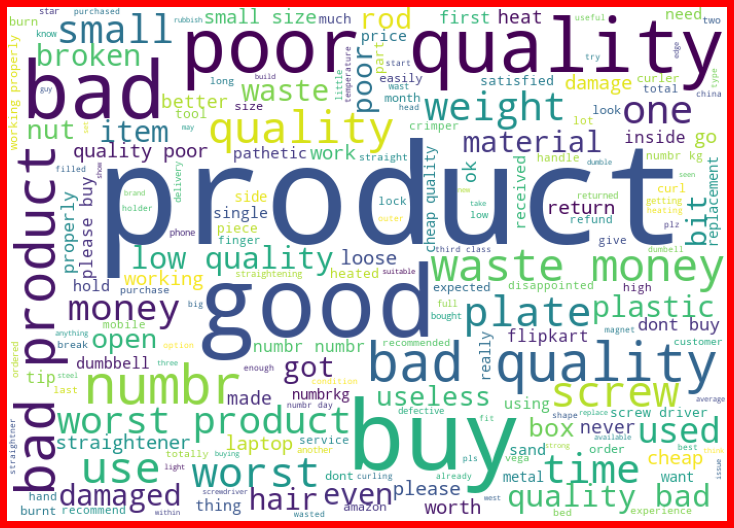

In [36]:
#Getting sense of words in Rating 1
plot = dft['Reveiw'][dft['Rating']==1.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

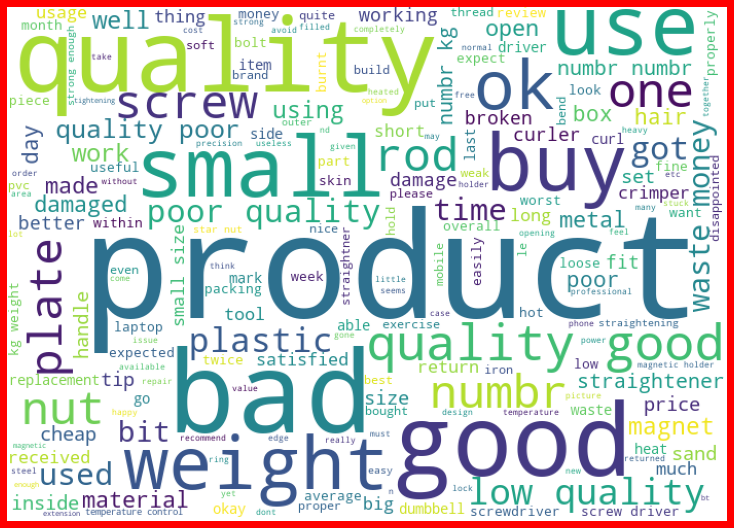

In [38]:
plot = dft['Reveiw'][dft['Rating']==2.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

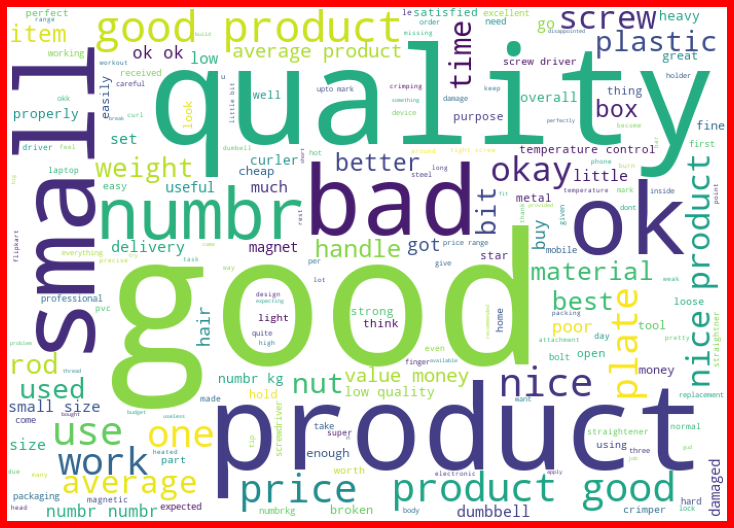

In [39]:
plot = dft['Reveiw'][dft['Rating']==3.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Feature selection

In [53]:
#Creating TFIDF features of monogram, bigram and trigram with max features upto 4000
tf_vec = TfidfVectorizer(ngram_range=(1,3),max_features=10000)

features = tf_vec.fit_transform(dft['Reveiw'])

x = features
y = dft['Rating']

In [54]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

# Model Selection

In [55]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [56]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [57]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [58]:
Model= []
score= []
cvs=[]
for name,model in models:

    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    score.append(AS*100)
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')

KNeighborsClassifier(n_neighbors=6)


classification_report
               precision    recall  f1-score   support

           1       0.64      0.33      0.44       210
           2       0.12      0.10      0.11        78
           3       0.26      0.35      0.30       149
           4       0.35      0.15      0.21       199
           5       0.38      0.67      0.48       223

    accuracy                           0.36       859
   macro avg       0.35      0.32      0.31       859
weighted avg       0.39      0.36      0.34       859



DecisionTreeClassifier(random_state=6)


classification_report
               precision    recall  f1-score   support

           1       0.58      0.63      0.60       210
           2       0.27      0.18      0.22        78
           3       0.32      0.30      0.31       149
           4       0.30      0.19      0.23       199
           5       0.49      0.68      0.57       223

    accuracy                           0.44       859
   m

In [59]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,35.972061,31.849352
1,DecisionTreeClassifier,44.353900,44.478452
2,RandomForestClassifier,50.756694,47.856779
3,AdaBoostClassifier,48.428405,46.738060
4,MultinomialNB,53.550640,50.164038
5,GradientBoostingClassifier,49.476135,47.321461
6,BaggingClassifier,48.311991,45.899658
7,ExtraTreesClassifier,50.523865,48.252561


# HYPERPARAMETER TUNING

In [60]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=96)   
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     
print(rfc.best_score_)

{'n_estimators': 100}
0.47218676519986563


In [61]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=96,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  49.47613504074505
Cross validation score:  45.759709659080734
Classification report: 

              precision    recall  f1-score   support

           1       0.59      0.71      0.64       210
           2       0.21      0.05      0.08        78
           3       0.39      0.33      0.36       149
           4       0.37      0.28      0.32       199
           5       0.54      0.75      0.63       223

    accuracy                           0.49       859
   macro avg       0.42      0.42      0.41       859
weighted avg       0.46      0.49      0.46       859

Confusion matrix: 

[[150   6  22   9  23]
 [ 43   4  18   9   4]
 [ 23   6  49  40  31]
 [ 27   2  31  55  84]
 [ 13   1   7  35 167]]


In [62]:
rating_predictor_final_model = GradientBoostingClassifier(n_estimators = 233, 
                                          min_samples_split = 2, 
                                          min_samples_leaf = 1, 
                                          max_features = 'auto', 
                                          max_depth = 100)

In [63]:
rating_predictor_final_model

GradientBoostingClassifier(max_depth=100, max_features='auto', n_estimators=233)

# Final model

In [64]:
rating_prediciton=rfc.predict(x)
Ratings_Prediction = pd.DataFrame({'Prediciton' : rating_prediciton})
Ratings_Prediction.head(5)

,Prediciton
0,1
1,1
2,1
3,1
4,1
